# Exercise 4.9

In [1]:
#Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data
path = r'C:\Users\lydia\OneDrive\Documents\Career Foundry Data\Data Immersion\Acheivement 4\Instacart Basket Analysis May-2023'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'order_product_3.pkl'))

### Create bar chart

<Axes: >

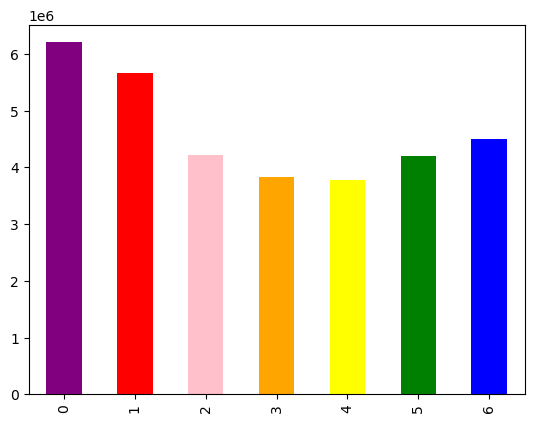

In [3]:
df['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange','yellow','green', 'blue'])

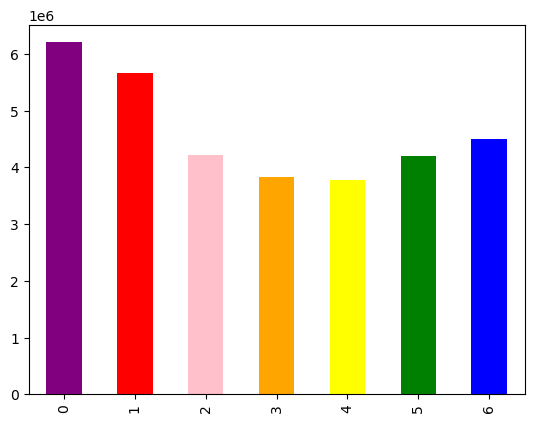

In [4]:
bar = df['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [5]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_orders_dow.png'))

### Create histogram

<Axes: ylabel='Frequency'>

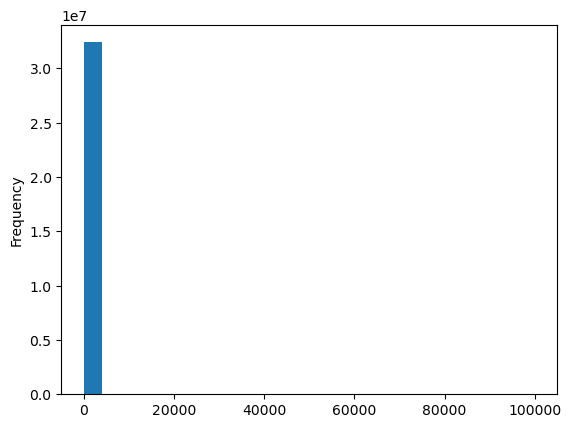

In [6]:
df['prices'].plot.hist(bins = 25)

Observation: odd histogram shape due to outlier of 99,999 in the prices column.

### Creating scatterplot to check for the outliers

In [ ]:
sns.scatterplot(x = 'prices', y = 'prices', data = df)

<Axes: xlabel='prices', ylabel='prices'>

Obervation: potentially 2 outliers, with one near the 20,000 mark too.

In [ ]:
# Further exploratory analysis on outliers
df.loc[df['prices'] > 100]

Observation: 5127 rows of outliers that correspond to $14,900 and $99,000.

In [ ]:
# Convert the outliers to missing 
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [ ]:
df['prices'].max()

### Making histogram again

In [ ]:
hist = df['prices'].plot.hist(bins = 25)

In [ ]:
hist_2 = df['prices'].plot.hist(bins = 70)

In [ ]:
# Export histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'hist_prices.png'))

### Creating Line Charts

In [ ]:
# Create random samples 
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [ ]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7
dev

In [ ]:
# Store 70% of the sample in the dataframe big
big = df[dev]

In [ ]:
# Store 30% of the sample in the dataframe small
small = df[~dev]

In [ ]:
len(df)

In [ ]:
len(big) + len(small)

In [ ]:
# Create dataframe with only the required columns to make processing time quicker
df_2 = small[['orders_day_of_week', 'prices']]

In [ ]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [ ]:
# Export line graph
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'line_prices_dow.png'))

In [ ]:
df_3 = small[['order_time_of_day', 'prices']]

In [ ]:
line_2 = sns.lineplot(data = df_3, x = 'order_time_of_day', y = 'prices')